### Objective

    Predicting Heart Disease. Analyze the data set and identify most relevant heart disease related risk factors as well as predict the overall risk.
Possible Work to be done
1. Perform exploratory analysis on the data and describe your understanding of the data.
2. Perform data wrangling / pre-processing
a.       E.g., missing data, normalization, discretization, etc.
3. Apply any two feature selection engineering techniques
4. Compare the two selected feature engineering techniques.
5. Plot top 5, 6, and 8 features.
6. Provide a high-level description of Machine Learning models – Logistic regression and Decision tree, ANN to predict.
7. Compare the performance of the two classifiers – Logistic regression and Decision tree to predict.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/data_oversame.csv
./data/Heart.csv
./data/dataset_fe.csv


In [2]:
data = pd.read_csv('./data/Heart.csv')
#data = data.dropna()
target = 'TenYearCHD'
X = data.drop(target,1)
y = data[target]


In [3]:
from imblearn.over_sampling import SMOTE 


<AxesSubplot:>

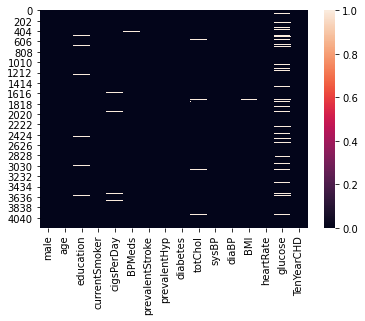

In [5]:
sns.heatmap(data=data.isna())

In [6]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
sm = SMOTE(random_state=26)
X_res, y_res = sm.fit_resample(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_res.shape, y_res.shape

In [ ]:
data

In [ ]:
y_res.value_counts()

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(X_res.corr(), annot=True)

In [ ]:
df_discreet = [x for x in X_res.columns if X_res[x].nunique() < 39]
df_discreet = X_res[df_discreet]
df_discreet

In [ ]:
data[target].value_counts()

In [ ]:
sns.countplot(x=y_res)

## the data is imbalance must smot it

In [ ]:
for x in df_discreet.columns:
    sns.countplot(x=df_discreet[x])
    plt.title(x)
    plt.show()

In [ ]:
for x in df_discreet.columns:
    df = data.copy()
    X_res.groupby(x)[y_res].mean().plot()
    plt.title(x)
    plt.show()

In [ ]:
for x in df_discreet.columns:
    df = data.copy()
    sns.displot(data=X_res,x=x,hue=y_res)
    plt.title(x)
    plt.show()

In [ ]:
df_cont = [x for x in X_res.columns if x not in df_discreet.columns]
df_cont = X_res[df_cont]
df_cont

In [ ]:
df_cont.describe()

In [ ]:
for col in df_cont.columns:
    sns.displot(data=df_cont,x=col)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [ ]:
for col in df_cont.columns:
    df = data.copy()
    sns.displot(data=df,x=col,hue=target)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

### heart rate looks interesting as the distribution is slighly different depending on the if TenYearChd

In [ ]:
X_res.heartRate.describe()

In [ ]:
#X_res[X_res.heartRate > 82]

In [ ]:
#X_res[target].value_counts()

In [ ]:
#data[data.heartRate > 82][target].value_counts()[1]/data[target].value_counts()[1]

In [ ]:
#plt.scatter(data.heartRate,data[target])

In [ ]:
for col in df_cont.columns:
    df = data.copy()
    sns.scatterplot(x=X_res[col],y=y_res)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [ ]:
for col in df_cont.columns:
    df = data.copy()
    sns.scatterplot(x=X_res[col],y=y_res,hue=y_res)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [ ]:
for col in df_cont.columns:
    sns.boxplot(data=df_cont,y=col)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [ ]:
data_new = X_res.copy()

In [ ]:
data_new[target] = y_res

In [ ]:
data_new

In [ ]:
data.to_csv("data/data_oversame.csv",index=False)